# Federalist Papers Authorship Attribution
<img src=https://constitutioncenter.org/images/uploads/blog/Federalist_Papers_authors_twitter.jpg width=400></img>


The *Federalist Papers* is a collection of 85 essays written by Alexander Hamilton, James Madison, and John Hay under the pseudonym "Publius" in 1787 and 1788. They advocated for the ratification of the Constitution and are widely considered to be foundational to America's system of government.

The authorship of 12 of the essays is disputed, as they are claimed by both Madison and Hamilton. We can attempt to resolve this dispute using **computational stylometry**, which uses statistical methods to characterize the stylistic elements of a text or across texts of a certain author.

Authorship attribution of the *Federalist Papers* is a well-studied problem, and the methodology we'll be looking at today is a simple approach based off of [this](https://kanishka.xyz/post/my-first-few-open-source-contributions-authorship-attribution-of-the-federalist-papers/) blog post by Kanishka Misra.

### Loading the data
Add the folder [here](https://drive.google.com/drive/folders/1eHe0iK2VOcY7MQCy3kNthNIGoMNdG3Qa?usp=sharing) to your Drive. The below code makes your drive accessible to this notebook, so follow the instructions that appear once you run the cell.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Make sure that you have correctly given yourself access to the materials! `ls` is a command to list the contents of the specified folder, so the output should be: `disputed  hamilton  jay  madison` (the 4 subfolders in `papers`)

In [ ]:
papers = "/content/drive/MyDrive/papers"
!ls $papers

disputed  hamilton  jay  madison


Now, let's load the papers. This code generates a list of the papers written by Hamilton, which can be found in `papers/hamilton`. Write the code to identify the papers by Madison and the disputed papers as well (which can be found in `papers/madison` and in `papers/disputed`).

In [ ]:
import glob
import os

# Note: glob.glob() returns a list of paths matching a pathname pattern.
# The pattern "papers/hamilton/*" uses * to signify all files in "papers/hamilton"
hamilton = glob.glob(f'{papers}/hamilton/*')
print('contents of hamilton: ', hamilton)

# TODO: uncomment and complete the below code!
madison = glob.glob(f'{papers}/madison/*')
disputed = glob.glob(f'{papers}/disputed/*')

contents of hamilton:  ['/content/drive/MyDrive/papers/hamilton/26.txt', '/content/drive/MyDrive/papers/hamilton/29.txt', '/content/drive/MyDrive/papers/hamilton/84.txt', '/content/drive/MyDrive/papers/hamilton/71.txt', '/content/drive/MyDrive/papers/hamilton/36.txt', '/content/drive/MyDrive/papers/hamilton/60.txt', '/content/drive/MyDrive/papers/hamilton/24.txt', '/content/drive/MyDrive/papers/hamilton/67.txt', '/content/drive/MyDrive/papers/hamilton/25.txt', '/content/drive/MyDrive/papers/hamilton/8.txt', '/content/drive/MyDrive/papers/hamilton/73.txt', '/content/drive/MyDrive/papers/hamilton/9.txt', '/content/drive/MyDrive/papers/hamilton/7.txt', '/content/drive/MyDrive/papers/hamilton/16.txt', '/content/drive/MyDrive/papers/hamilton/79.txt', '/content/drive/MyDrive/papers/hamilton/74.txt', '/content/drive/MyDrive/papers/hamilton/30.txt', '/content/drive/MyDrive/papers/hamilton/83.txt', '/content/drive/MyDrive/papers/hamilton/17.txt', '/content/drive/MyDrive/papers/hamilton/69.txt',

Lets take a look at the files' contents.

In [ ]:
filename = madison[0]
print(f'The path to the first paper written by Madison is: {filename}')
print("The first 500 characters of the file:\n\n")
with open(filename) as f:
    print(f.read()[:500])

The path to the first paper written by Madison is: /content/drive/MyDrive/papers/madison/18.txt
The first 500 characters of the file:


 18



The Same Subject Continued

(The Insufficiency of the Present Confederation to Preserve the
Union)

For the Independent Journal.



HAMILTON AND MADISON



To the People of the State of New York:

AMONG the confederacies of antiquity, the most considerable was
that of the Grecian republics, associated under the Amphictyonic
council. From the best accounts transmitted of this celebrated
institution, it bore a very instructive analogy to the present
Confederation of the American States.

Th


Looks good, but let's do some light formatting to remove extraneous information, like new lines (`\n`) and carriage returns (`\r`). Feel free to ignore this portion of the code.

In [ ]:
madison_papers = []
for filename in madison:
    with open(filename) as f:
        madison_papers.append(f.read().replace('\n', ' ').replace('\r',''))

hamilton_papers = []
for filename in hamilton:
    with open(filename) as f:
        hamilton_papers.append(f.read().replace('\n', ' ').replace('\r',''))

disputed_papers = []
for filename in disputed:
    with open(filename) as f:
        disputed_papers.append(f.read().replace('\n', ' ').replace('\r',''))

Now, the paper we looked at should be one long, (relatively) clean string.



In [ ]:
print(madison_papers[0])

 18    The Same Subject Continued  (The Insufficiency of the Present Confederation to Preserve the Union)  For the Independent Journal.    HAMILTON AND MADISON    To the People of the State of New York:  AMONG the confederacies of antiquity, the most considerable was that of the Grecian republics, associated under the Amphictyonic council. From the best accounts transmitted of this celebrated institution, it bore a very instructive analogy to the present Confederation of the American States.  The members retained the character of independent and sovereign states, and had equal votes in the federal council. This council had a general authority to propose and resolve whatever it judged necessary for the common welfare of Greece; to declare and carry on war; to decide, in the last resort, all controversies between the members; to fine the aggressing party; to employ the whole force of the confederacy against the disobedient; to admit new members. The Amphictyons were the guardians of reli

For convenience, let's also make all of the papers by each author available as one long string. Complete the following code using Python's String.join() function.

In [ ]:
madison_papers_all = ' '.join(madison_papers)
hamilton_papers_all = ' '.join(hamilton_papers)
disputed_papers_all = ' '.join(disputed_papers)

### A closer look at the texts
We'll use Python's Natural Language Toolkit (`nltk`) to analyze the texts. Here is an example of how to use NLTK to tokenize a text (aka split it into words).

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
text = "This is a sample piece of text! Exciting stuff."
tokens = nltk.word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['This', 'is', 'a', 'sample', 'piece', 'of', 'text', '!', 'Exciting', 'stuff', '.']


Write some code to tokenize the strings `hamilton_papers_all`, `madison_papers_all`, and `disputed_papers_all` and fill in the `tokens` dictionary.

In [ ]:
tokens = {
    'hamilton': None,
    'madison': None,
    'disputed': None
}
tokens['hamilton'] = nltk.word_tokenize(hamilton_papers_all)
tokens['madison'] = nltk.word_tokenize(madison_papers_all)
tokens['disputed'] = nltk.word_tokenize(disputed_papers_all)

Let's take a look at what words are most frequent. 

In [ ]:
from collections import Counter
def most_frequent(words, n=10):
    """The most frequent tokens in the given list"""
    tups = Counter.most_common(Counter(words), n)
    return [tup[0] for tup in tups]

# Write some code to print out the most frequent words in each set of tokens
# IMPLEMENT!
print(most_frequent(tokens['hamilton']))

['the', ',', 'of', 'to', '.', 'in', 'and', 'a', 'be', 'that']


These don't seem too relevant. Let's take out some of the most common (and least informative) words.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
blocklist = stopwords.words("english")
blocklist += ['would','may']
blocklist += [',','.','?',';']

for author in tokens.keys():
    tokens[author] = [word for word in tokens[author] if word.lower() not in blocklist]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Let's try again.

In [ ]:
print(most_frequent(tokens['hamilton']))
print(most_frequent(tokens['madison']))
print(most_frequent(tokens['disputed']))

['States', 'State', 'government', 'power', 'upon', 'one', 'must', 'national', 'might', 'people']
['States', 'government', 'State', 'power', 'powers', 'one', 'people', 'Constitution', 'federal', 'must']
['people', 'government', 'States', 'State', 'representatives', 'every', 'one', 'number', 'must', 'federal']


### Generating Stylometric Features

There are many ways to approach this authorship attribution problem. We are going to use the approach of counting **n-gram frequencies**.

An **n-gram** is just a sequence of words or characters that has n elements. Below is some code that generates 2-grams from the words used by Hamilton. 

In [ ]:
from nltk.util import ngrams
list(ngrams(tokens['hamilton'], 2))[:10]

[('26', 'Idea'),
 ('Idea', 'Restraining'),
 ('Restraining', 'Legislative'),
 ('Legislative', 'Authority'),
 ('Authority', 'Regard'),
 ('Regard', 'Common'),
 ('Common', 'Defense'),
 ('Defense', 'Considered'),
 ('Considered', 'Independent'),
 ('Independent', 'Journal')]

We can also make n-grams on the **character** level.

In [ ]:
list(ngrams(hamilton_papers_all, 2))[6:20]

[(' ', 'T'),
 ('T', 'h'),
 ('h', 'e'),
 ('e', ' '),
 (' ', 'I'),
 ('I', 'd'),
 ('d', 'e'),
 ('e', 'a'),
 ('a', ' '),
 (' ', 'o'),
 ('o', 'f'),
 ('f', ' '),
 (' ', 'R'),
 ('R', 'e')]

Counting the frequencies of these n-grams can actually reveal a lot about a paper's stylistic characteristics--and by extension, how well it fits into the characteristics of a certain writer. For example, one person might use the word 'the' more than someone else, or they might be fond of certain turns of phrase, like 'on the contrary.' On another level, characteristics of text that are harder to interpret can be informative too. Anything from the percentage of nouns in a sentence to the frequency of different character combinations in a text can be informative.

We will move on and use **character 3-gram frequencies** to characterize all of these texts. Then, we will see whether the disputed papers are stylistically closer to Hamilton's papers or Madison's papers.

But first, let's stop working on the level of authors and start working on the level of individual essays.

In [ ]:
# list of the names (aka numbers) of all the papers
def path_to_paper_name(path):
    return path.split('/')[-1].split('.')[0]
hamilton_paper_names = [path_to_paper_name(path) for path in hamilton]
madison_paper_names = [path_to_paper_name(path) for path in madison]
disputed_paper_names = [path_to_paper_name(path) for path in disputed]
all_paper_names = hamilton_paper_names + madison_paper_names + disputed_paper_names

# list of the texts of all the papers
all_paper_texts = hamilton_papers + madison_papers + disputed_papers

# dictionary mapping the name of a paper to its text
all_papers = dict(zip(all_paper_names, all_paper_texts))

Now, let's generate the trigrams that are used across all of the papers.

In [ ]:
trigrams = {} # dictionary of 3-grams for each federalist paper
for paper in all_papers.keys():
    trigrams[paper] = [] # list of trigrams in the paper

all_trigrams = [] # list of all trigrams (including duplicates)


# Write some code to populate the trigrams dictionary and the all_trigrams list.
# Remember, all_papers is a dictionary mapping paper names to their texts, 
# and ngrams(text, 3) generates all the trigrams in a paper's text

# TODO: IMPLEMENT!

for paper, paper_text in all_papers.items():
    for trigram in ngrams(paper_text, 3):
        trigrams[paper].append(''.join(trigram))
        all_trigrams.append(''.join(trigram))

We could compute the frequency of all trigrams, but that would take a lot of computational power. Plus, it's not necessary to use all that information. Let's consider only the trigrams that appear at least 200 times in the total corpus (aka all the papers put together).

In [ ]:
# using Counter, we can compute trigram frequencies in the whole corpus
trigram_counts = Counter(all_trigrams)
# remember, Counter returns a dictionary mapping words to the times they occur
print(trigram_counts['the'])

21231


Write some code to populate `relevant_trigrams` with trigrams that appear >200 times in the corpus. (The list should have 1096 unique elements once you've populated it.)

In [ ]:
# TODO: IMPLEMENT!
relevant_trigrams = []
for trigram in trigram_counts.keys():
    if trigram_counts[trigram] > 200:
        relevant_trigrams.append(trigram)
len(relevant_trigrams) 

1096

Now that we have a set of the most relevant trigrams, we need to calculate their frequencies in each of the essays. Because we're only interested in a limited number of trigrams, we won't use Counter.

Note: this cell should take a few seconds to run!

In [ ]:
trigram_frequencies = {}
for paper in all_papers.keys():
    trigram_frequencies[paper] = {}

# count the number of times each relevant trigram appears in each paper
for paper in all_papers.keys():
    for trigram in trigrams[paper]:
        if trigram in relevant_trigrams:
            try:
                trigram_frequencies[paper][trigram] += 1 
            except:
                trigram_frequencies[paper][trigram] = 0

# divide by the number of trigrams total in each paper to obtain frequency
for paper in all_papers.keys():
    for trigram in trigram_frequencies[paper]:
        trigram_frequencies[paper][trigram] /= len(trigrams[paper])

In [ ]:
# the frequency of 'the' paper 30
trigram_frequencies['30']['the']

0.016747018523217458

If you print `trigram_frequencies`, you can see that it's not very easy to work with. To make things more manageable, we will load the dictionary into a Pandas DataFrame. (Pandas is a data science library that is useful in all sorts of contexts, and if you're interested in data science and machine learning, it's super useful to learn how to use it!)

In [ ]:
import pandas as pd
# load the dictionary into a dataframe
freqs = pd.DataFrame(data=trigram_frequencies, index=None).T
# peek at the first 5 entries of the dataframe
freqs.head()

,,T,Th,The,he,of,of,est,str,tra,ain,ini,nin,ing,ng,g t,th,the,egi,gis,isl,sla,lat,ati,tiv,ive,ve,uth,tho,hor,ori,rit,ity,ty,y i,in,in,ega,ard,rd,...,", e",cia,erv,ice,adv,acc,"is,",efo,tle,r i,icu,f f,ali,br,jur,epu,sts,dmi,urt,nis,ls,als,e,rts,t,s,r,n,y,a,f,p,e,",",c,i,t,w,o,s
26,0.000640,0.000213,0.001138,0.000996,0.014441,0.010600,0.010386,0.001423,0.000569,0.000783,0.000996,0.000213,0.000213,0.002774,0.002632,0.000569,0.021271,0.016860,0.000925,0.000996,0.000925,0.000925,0.001352,0.002703,0.001067,0.001992,0.002348,0.000569,0.001138,0.000569,0.000854,0.001138,0.001707,0.001707,0.000356,0.006616,0.004837,0.000213,0.000783,0.000285,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,0.000687,0.000305,0.000916,0.000458,0.016491,0.011681,0.011376,0.000840,0.000534,0.000534,0.000611,0.000458,0.000458,0.004428,0.004046,0.001222,0.023591,0.020232,0.000153,0.000229,0.000076,0.000153,0.001145,0.002138,0.000076,0.000382,0.000840,0.000458,0.000840,0.000458,0.000458,0.000763,0.000763,0.000763,0.000382,0.006337,0.002978,NaN,0.000153,0.000076,...,0.000000,0.000153,0.000687,0.000993,0.000076,0.000076,0.000076,0.000076,0.000305,0.000763,0.000153,0.000076,0.000076,0.000076,0.000076,0.000153,0.000076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,0.000405,0.000243,0.001783,0.001499,0.015760,0.011952,0.011506,0.001053,0.000608,0.000608,0.001580,0.000284,0.000243,0.002633,0.001945,0.000648,0.023863,0.018717,0.000486,0.000446,0.000446,0.000446,0.001296,0.003525,0.000648,0.001215,0.001945,0.000122,0.000770,0.000122,0.000243,0.000608,0.000486,0.001053,0.000284,0.005429,0.003889,0.000041,0.000203,0.000162,...,0.000243,NaN,0.000567,0.000567,0.000000,0.000284,0.000203,0.000243,0.000122,0.000608,0.000203,0.000081,0.000041,0.000081,0.000000,0.000041,0.000081,0.000162,0.000162,0.000324,0.000243,0.000162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,0.000873,0.000388,0.001455,0.000970,0.018720,0.010087,0.009505,0.000970,0.000679,0.001067,0.000679,0.000291,0.000097,0.001649,0.001552,0.000485,0.023860,0.022405,0.000970,0.001261,0.000873,0.000873,0.001455,0.003298,0.001843,0.002716,0.002910,0.000194,0.000582,0.000582,0.000194,0.000679,0.001455,0.001552,0.000291,0.006790,0.003977,0.000097,0.000582,0.000291,...,0.000097,0.000194,0.000485,0.000776,0.000097,0.000000,0.000097,0.000000,0.000388,0.000873,0.000000,0.000388,0.000000,0.000291,NaN,0.000097,0.000194,0.000000,NaN,0.000097,NaN,0.000000,0.0,0.000097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,0.000557,0.000371,0.001917,0.001608,0.015648,0.011381,0.010948,0.001423,0.000433,0.000124,0.000866,0.000247,0.000186,0.002165,0.001856,0.000619,0.022390,0.018864,0.000557,0.000557,0.000557,0.000557,0.001175,0.004020,0.000309,0.000804,0.001856,0.000247,0.001175,0.000247,0.000247,0.000680,0.000990,0.001299,0.000619,0.006989,0.004206,0.000000,0.000186,0.000000,...,0.000247,0.000124,0.000247,0.000495,0.000371,0.000186,0.000186,0.000062,0.000000,0.000557,0.000495,0.000062,0.000186,0.000186,NaN,0.000000,0.000186,0.000247,0.000000,0.000309,0.000186,0.000062,NaN,0.000186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


That looks much better. 
- Each row of the dataframe represents one paper. 
- Each column represents a trigram. 

We can also see this by printing out the **index** (aka row names) and **columns** of the dataframe.

In [ ]:
print(freqs.index)

Index(['26', '29', '84', '71', '36', '60', '24', '67', '25', '8', '73', '9',
       '7', '16', '79', '74', '30', '83', '17', '69', '32', '77', '15', '70_2',
       '21', '66', '76', '61', '22', '70', '68', '11', '35', '65', '1', '78',
       '13', '81', '85', '28', '23', '6', '27', '72', '12', '80', '31', '82',
       '75', '34', '33', '59', '18', '42', '43', '39', '40', '10', '45', '37',
       '47', '38', '41', '19', '20', '46', '14', '48', '44', '54', '49', '57',
       '56', '52', '53', '62', '50', '58', '63', '51', '55'],
      dtype='object')


In [ ]:
print(freqs.columns)

Index(['   ', '  T', ' Th', 'The', 'he ', ' of', 'of ', 'est', 'str', 'tra',
       ...
       'f  ', '  p', '  e', ',  ', '  c', '  i', '  t', '  w', '  o', '  s'],
      dtype='object', length=1096)


Feel free to play around a little more. Try functions like `freqs.tail()` or `freqs.describe()` if you're curious.



Still, we have to do a little more preprocessing. Not all trigrams appear in all papers, so they wouldn't appear in the dictionary we created. (Scroll all the way to the right of the DataFrame if you're curious.) We need to populate those fields with 0.

In [ ]:
freqs = freqs.fillna(0) 

### Authorship Attribution!
We've generated a lot of numbers, and now we can do some data analysis to make sense of it all.

Imagine each paper as a point in high dimensional space. We can't visualize 1096 dimensions, but each paper really can be imagined as a point with the 1096 coordinates given by its row in the DataFrame.

We can use some data science to parse these 1096 dimensions into terms we can understand.

In [ ]:
freqs.head()

,,T,Th,The,he,of,of,est,str,tra,ain,ini,nin,ing,ng,g t,th,the,egi,gis,isl,sla,lat,ati,tiv,ive,ve,uth,tho,hor,ori,rit,ity,ty,y i,in,in,ega,ard,rd,...,", e",cia,erv,ice,adv,acc,"is,",efo,tle,r i,icu,f f,ali,br,jur,epu,sts,dmi,urt,nis,ls,als,e,rts,t,s,r,n,y,a,f,p,e,",",c,i,t,w,o,s
26,0.000640,0.000213,0.001138,0.000996,0.014441,0.010600,0.010386,0.001423,0.000569,0.000783,0.000996,0.000213,0.000213,0.002774,0.002632,0.000569,0.021271,0.016860,0.000925,0.000996,0.000925,0.000925,0.001352,0.002703,0.001067,0.001992,0.002348,0.000569,0.001138,0.000569,0.000854,0.001138,0.001707,0.001707,0.000356,0.006616,0.004837,0.000213,0.000783,0.000285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.000687,0.000305,0.000916,0.000458,0.016491,0.011681,0.011376,0.000840,0.000534,0.000534,0.000611,0.000458,0.000458,0.004428,0.004046,0.001222,0.023591,0.020232,0.000153,0.000229,0.000076,0.000153,0.001145,0.002138,0.000076,0.000382,0.000840,0.000458,0.000840,0.000458,0.000458,0.000763,0.000763,0.000763,0.000382,0.006337,0.002978,0.000000,0.000153,0.000076,...,0.000000,0.000153,0.000687,0.000993,0.000076,0.000076,0.000076,0.000076,0.000305,0.000763,0.000153,0.000076,0.000076,0.000076,0.000076,0.000153,0.000076,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,0.000405,0.000243,0.001783,0.001499,0.015760,0.011952,0.011506,0.001053,0.000608,0.000608,0.001580,0.000284,0.000243,0.002633,0.001945,0.000648,0.023863,0.018717,0.000486,0.000446,0.000446,0.000446,0.001296,0.003525,0.000648,0.001215,0.001945,0.000122,0.000770,0.000122,0.000243,0.000608,0.000486,0.001053,0.000284,0.005429,0.003889,0.000041,0.000203,0.000162,...,0.000243,0.000000,0.000567,0.000567,0.000000,0.000284,0.000203,0.000243,0.000122,0.000608,0.000203,0.000081,0.000041,0.000081,0.000000,0.000041,0.000081,0.000162,0.000162,0.000324,0.000243,0.000162,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.000873,0.000388,0.001455,0.000970,0.018720,0.010087,0.009505,0.000970,0.000679,0.001067,0.000679,0.000291,0.000097,0.001649,0.001552,0.000485,0.023860,0.022405,0.000970,0.001261,0.000873,0.000873,0.001455,0.003298,0.001843,0.002716,0.002910,0.000194,0.000582,0.000582,0.000194,0.000679,0.001455,0.001552,0.000291,0.006790,0.003977,0.000097,0.000582,0.000291,...,0.000097,0.000194,0.000485,0.000776,0.000097,0.000000,0.000097,0.000000,0.000388,0.000873,0.000000,0.000388,0.000000,0.000291,0.000000,0.000097,0.000194,0.000000,0.000000,0.000097,0.000000,0.000000,0.0,0.000097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.000557,0.000371,0.001917,0.001608,0.015648,0.011381,0.010948,0.001423,0.000433,0.000124,0.000866,0.000247,0.000186,0.002165,0.001856,0.000619,0.022390,0.018864,0.000557,0.000557,0.000557,0.000557,0.001175,0.004020,0.000309,0.000804,0.001856,0.000247,0.001175,0.000247,0.000247,0.000680,0.000990,0.001299,0.000619,0.006989,0.004206,0.000000,0.000186,0.000000,...,0.000247,0.000124,0.000247,0.000495,0.000371,0.000186,0.000186,0.000062,0.000000,0.000557,0.000495,0.000062,0.000186,0.000186,0.000000,0.000000,0.000186,0.000247,0.000000,0.000309,0.000186,0.000062,0.0,0.000186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One way we can understand the relationship between these different points is their **distance** from each other.

Papers (aka points) that are closer together have more similar tri-gram frequencies and, in general, have more similar **style**. We would expect all of the papers that Hamilton wrote to be relatively close together, in a **cluster**, and all of the papers that Madison wrote to be in another cluster.

To get started, let's calculate these distances. The SciPy function `scipy.spatial.distance.cdist()` calculates the 'distance' between each pair of points in 1096-dimensional space. It does this by calculating **cosine similarity**. Here's a formula and diagram if you're interested in the math. (Technically, we are calculating cosine dissimilarity because we're interested in distance, so it's 1 minus the cosine similarity.)

<img src="https://miro.medium.com/max/2636/1*xxYHHrhT9HZJIBEsfW7W0Q.png" width=700></img>
<img src="https://miro.medium.com/max/686/1*dGWOzgAYv9NUkWvkETQUTQ.png" width=400></img>


If not, feel free to think of it intuitively as **how close or not close two documents are, stylistically**.

In [ ]:
import scipy
pairwise_dist = scipy.spatial.distance.cdist(freqs.values, freqs.values, 'cosine')
# read more about the cdist function here: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

The resulting array is 81 by 81, with `pairwise_dist[i][j]` representing the distance between paper `i` and paper `j`.

It has a diagonal of all 0s, because the distance between a text and itself should be 0.

In [ ]:
pairwise_dist.shape

(81, 81)

In [ ]:
pairwise_dist[10][10]

0.0

Now that we have the distances between each pair of texts, we can **approximate the relationships between all of the texts in 2 dimensions**, which is something we can visually understand.

We do this using something called [multi-dimensional scaling](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html), which you can read more about if you're interested. Otherwise, feel free to skip over the details.

In [ ]:
# we use the implementation from scikit-learn, another very important data science/ML library.
from sklearn.manifold import MDS

# defining the kind of transformation we're looking for. We want
# to reduce our points to 2 dimensions, and we want to use the
# distances that we precomputed.
embedding = MDS(n_components=2, dissimilarity='precomputed')

# We can apply the transformation to our array of pairwise distances between papers
papers_in_2d = embedding.fit_transform(pairwise_dist)
papers_in_2d.shape

(81, 2)

We end up with an array with 81 rows and just 2 columns, which we can then plot using **matplotlib**, a Python data visualization library.


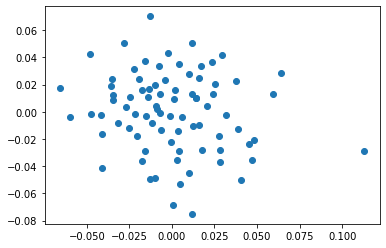

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(papers_in_2d[:,0], papers_in_2d[:,1])
plt.show()

This shows us the relative distances between texts, preserved as well as possible when moving from 1096 dimensions down to 2. The axes don't mean much--it's the relative distances better points that matter.

Still, this plot doesn't tell us much. Let's color each of these points by whether they were written by Hamilton, Madison, or an uncertain author to see if there are any patterns.

To do this, we need to make a dictionary mapping a paper's name/number to its authors colors

In [ ]:
# Populate the dictionary here!
paper_name_to_author = {}

for pname in hamilton_paper_names:
    paper_name_to_author[pname] = 'red'
for pname in madison_paper_names:
    paper_name_to_author[pname] = 'blue'
for pname in disputed_paper_names:
    paper_name_to_author[pname] = 'green'
    
colors = [paper_name_to_author[pname] for pname in freqs.index]

Let's plot! Try using the `c` keyword argument in the `plt.scatter()` function.

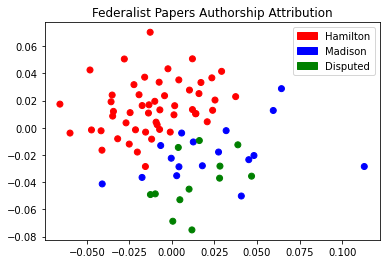

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(papers_in_2d[:,0], papers_in_2d[:,1], c=colors)
plt.title('Federalist Papers Authorship Attribution') # give your plot a title


# this code gives us a custom legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
r_patch = mpatches.Patch(color='red', label='Hamilton')
b_patch = mpatches.Patch(color='blue', label='Madison')
g_patch = mpatches.Patch(color='green', label='Disputed')
plt.legend(handles=[r_patch, b_patch, g_patch])

plt.show()

We can see that Hamilton's and Madison's papers do in fact cluster at the top and bottom of the plot, and we can see that the green disputed papers fall closer to Madison's other papers.

This agrees with the general consensus of researchers who have worked on this problem. In the 1940s, Frederick Mosteller and David Wallace used statistical analysis in their paper, “Inference in an Authorship Problem,” to conclude that Madison was the author of all 12 disputed papers.

This is just one application of stylometry to a problem in the social sciences, and I hope you're interested in learning more.